## Importer les Librairies

In [47]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## 1. Données

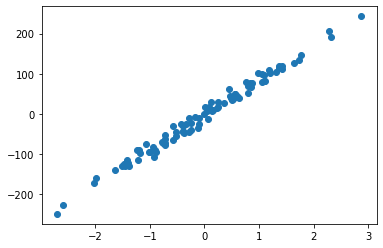

In [48]:
x,y = make_regression(n_samples = 100, n_features = 1, noise = 10)
plt.scatter(x,y)

In [49]:
# verification des tailles
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [50]:
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


In [51]:
#matrice X
X = np.hstack((np.ones(x.shape),x))
X

array([[ 1.        , -0.38442469],
       [ 1.        ,  0.6328951 ],
       [ 1.        , -0.78401969],
       [ 1.        , -1.06210129],
       [ 1.        , -1.47995914],
       [ 1.        ,  1.19930461],
       [ 1.        ,  1.04853142],
       [ 1.        , -0.72232705],
       [ 1.        ,  1.73320212],
       [ 1.        ,  0.80432809],
       [ 1.        ,  0.23857834],
       [ 1.        ,  1.10691614],
       [ 1.        ,  0.87133963],
       [ 1.        , -1.45264538],
       [ 1.        , -1.39770123],
       [ 1.        ,  0.55751241],
       [ 1.        ,  1.76341496],
       [ 1.        , -0.43758383],
       [ 1.        ,  0.85212374],
       [ 1.        , -1.21378824],
       [ 1.        , -1.18648185],
       [ 1.        , -0.75109612],
       [ 1.        , -0.73779234],
       [ 1.        ,  1.41246238],
       [ 1.        , -2.59275853],
       [ 1.        ,  1.0954889 ],
       [ 1.        , -1.64354944],
       [ 1.        , -0.56973889],
       [ 1.        ,

In [52]:
X.shape

(100, 2)

In [53]:
#vecteurs des parametres
beta = np.random.randn(2,1)
beta

array([[ 1.9081674 ],
       [-0.33162544]])

## 2. Modèle

In [54]:
def model(X,beta):
    return(X.dot(beta))

model(X,beta)

array([[2.0356524 ],
       [1.69828328],
       [2.16816827],
       [2.2603872 ],
       [2.3989595 ],
       [1.51044748],
       [1.5604477 ],
       [2.14770942],
       [1.33339348],
       [1.64143174],
       [1.82904875],
       [1.54108584],
       [1.61920901],
       [2.38990156],
       [2.37168068],
       [1.7232821 ],
       [1.32337413],
       [2.05328133],
       [1.62558149],
       [2.31069046],
       [2.30163496],
       [2.15724998],
       [2.15283811],
       [1.43975894],
       [2.76799209],
       [1.54487541],
       [2.4532102 ],
       [2.09710731],
       [2.1503445 ],
       [1.54801489],
       [2.36394319],
       [1.74338957],
       [1.93992277],
       [1.76177199],
       [1.3666684 ],
       [2.08029614],
       [1.51494183],
       [1.64096787],
       [1.82738547],
       [0.95612294],
       [1.98754143],
       [1.85649   ],
       [1.65588765],
       [1.45745404],
       [2.1461048 ],
       [2.03251157],
       [1.90307001],
       [2.101

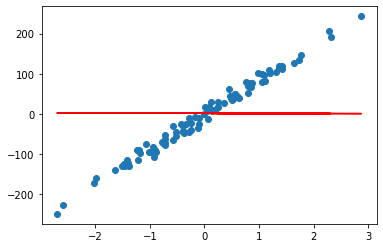

In [55]:
plt.scatter(x,y)
plt.plot(x,model(X,beta),c='r')

## EMV (MCO)

In [ ]:
X.T.dot(X    (X'X)^-1

In [56]:
betaMV =(np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
betaMV

array([[-2.07915185],
       [85.79263362]])

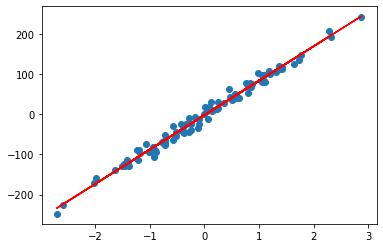

In [57]:
plt.scatter(x,y)
plt.plot(x,model(X,betaMV),c='r')

## R2

In [58]:
#Predictions
predictions = model(X, betaMV)

#Coefficient de détermination
def coef_determination(y,pred):
    u = ((y-pred)**2).sum()
    v = ((y-y.mean())**2).sum()
    return 1 - u/v

coef_determination(y,predictions)

0.9874374127916049

## 2. fonction de coût

In [59]:
def cost_function(X,y,beta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,beta)-y)**2)

cost_function(X,y,beta)

4281.7629949717575

## 3. Gradient

In [60]:
def gradient(X,y,theta):
    m = len(y)
    return 1/m *X.T.dot(model(X,theta)-y)

gradient(X,y,beta)

array([[  4.6844221 ],
       [-97.97887276]])

## 4. Descente du gradient

In [25]:
def gradient_descent(X, y, beta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        beta =  beta - learning_rate * gradient(X,y,beta)
        cost_history[i] = cost_function(X,y,beta)
    return beta, cost_history

In [92]:
beta_final, cost_history = gradient_descent(X, y, beta, learning_rate = 0.01, n_iterations =300)
beta_final

array([[-1.96836486],
       [83.01008723]])

In [78]:
betaMV

array([[-2.07915185],
       [85.79263362]])

In [93]:
predictions = model(X, beta_final)
coef_determination(y,predictions)

0.9863966060857345

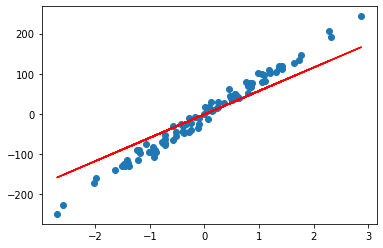

In [89]:
plt.scatter(x,y)
plt.plot(x,model(X,beta_final),c='r')

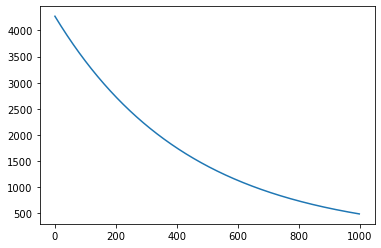

In [90]:
plt.plot(range(len(cost_history)), cost_history)

In [95]:
def search(X, y, beta):
    costs = []
    n_iters = []
    for iters in range(100, 800):
        beta_final, cost_history = gradient_descent(X, y, beta, learning_rate=0.01, n_iterations=iters)
        costs.append(cost_history[len(cost_history)-1])
        n_iters.append(iters)
    return n_iters[costs.index(min(costs))]
search(X,y,beta)

799